In [44]:
%matplotlib inline
import numpy as np
import pandas as pd

In [45]:
ratings = pd.read_csv('/Users/yashnisar/Downloads/ratings.csv', sep=',', usecols=['userId', 'movieId', 'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [46]:
# Number of unique users
ratings['userId'].nunique()

610

In [47]:
# Number of unique movies
ratings['movieId'].nunique()

9724

### Top 10 most rated movies

In [48]:
most_rated = ratings.movieId.value_counts()[:10]
print('MovieID\tNo.of ratings')
most_rated

MovieID	No.of ratings


356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: movieId, dtype: int64

### Aggregation of the total number of ratings and the average of all ratings

In [49]:
stat = ratings.groupby('movieId').agg({'rating': [np.size, np.mean]})
stat.head()

rating          
          size      mean
movieId                 
1        215.0  3.920930
2        110.0  3.431818
3         52.0  3.259615
4          7.0  2.357143
5         49.0  3.071429

### Sort the movies by the average rating

In [50]:
stat.sort_values([('rating', 'mean')], ascending=False).head()

rating     
          size mean
movieId            
88448      1.0  5.0
100556     1.0  5.0
143031     1.0  5.0
143511     1.0  5.0
143559     1.0  5.0

### Taking only those movies into consideration that have been rated by atleast 50 times

In [51]:
big_sample = stat['rating']['size'] >= 50
stat[big_sample].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
          size      mean
movieId                 
318      317.0  4.429022
858      192.0  4.289062
2959     218.0  4.272936
1276      57.0  4.271930
750       97.0  4.268041
904       84.0  4.261905
1221     129.0  4.259690
48516    107.0  4.252336
1213     126.0  4.250000
912      100.0  4.240000

### Count of different ratings

Text(0, 0.5, 'Number of movies')

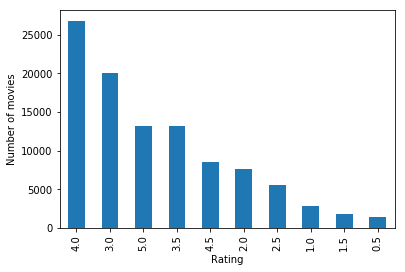

In [52]:
ax = ratings['rating'].value_counts().plot(kind='bar')
ax.set_xlabel("Rating")
ax.set_ylabel("Number of movies")

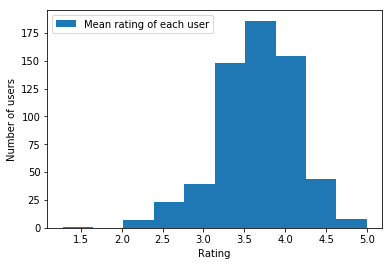

In [59]:
ax = ratings.groupby('userId').agg({'rating': [np.mean]}).plot(kind='hist')
ax.set_ylabel('Number of users')
ax.set_xlabel('Rating')
ax.legend(['Mean rating given by each user'])

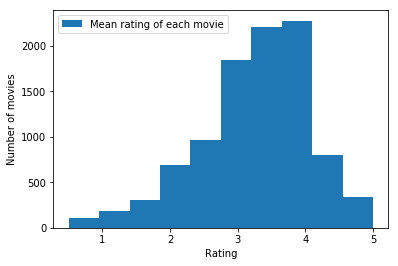

In [60]:
ax = ratings.groupby('movieId').agg({'rating': [np.mean]}).plot(kind='hist')
ax.set_ylabel('Number of movies')
ax.set_xlabel('Rating')
ax.legend(['Mean rating of each movie'])